In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import mne
from mne.preprocessing import ICA, create_eog_epochs
from mne import io, combine_evoked
from mne.minimum_norm import make_inverse_operator, apply_inverse
from mne.datasets import spm_face  # sample data
from glob import glob
import re
import yaml
from mne.preprocessing import ICA, read_ica
from mne.channels import make_standard_montage

print(__doc__)


Automatically created module for IPython interactive environment


Extracting parameters from /Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/QiuLiesefeld_SSVEP_0001.vhdr...
Setting channel info structure...
Reading 0 ... 6656639  =      0.000 ...  6656.639 secs...


/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_90494/2699609523.py:4: RuntimeWarning: Not setting positions of 3 eog channels found in montage:
['LO1', 'LO2', 'IO2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(raw_file,eog=('LO1', 'LO2', 'IO2'), misc='auto', scale=1.0, preload=True, verbose=None)


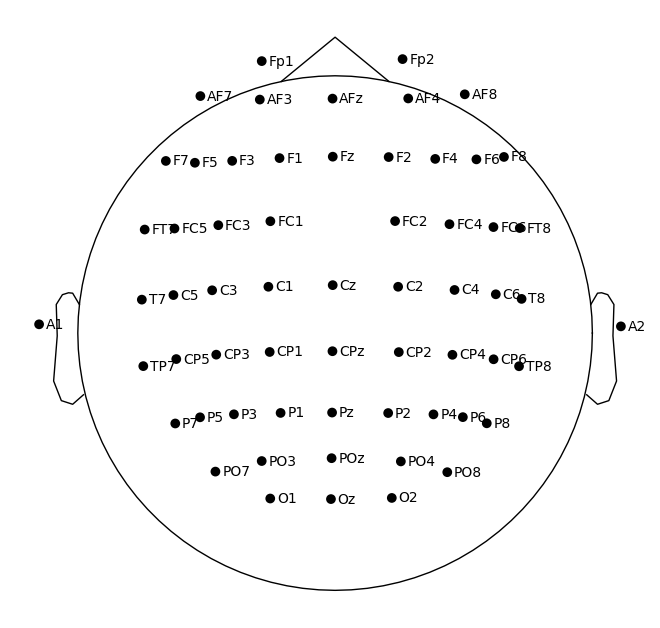

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  4', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 17', 'Stimulus/S 18', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 34', 'Stimulus/S 35', 'Stimulus/S 45', 'Stimulus/S 48', 'Stimulus/S 49', 'Stimulus/S 52', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 65', 'Stimulus/S 66', 'Stimulus/S 79', 'Stimulus/S 80', 'Stimulus/S 82', 'Stimulus/S 83', 'Stimulus/S 93', 'Stimulus/S 96', 'Stimulus/S 97', 'Stimulus/S 98', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S150', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S200', 'Stimulus/S240', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S244']
<RawBrainVision | QiuLiesefeld_SSVEP_0001.eeg, 64 x 6656640 (6656.6 s), ~3.17 GB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, LO1, FC5, FC1, C3, T7, A1, CP5, CP1, Pz, P3, ...
 chs: 61 EEG, 3 EOG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal,

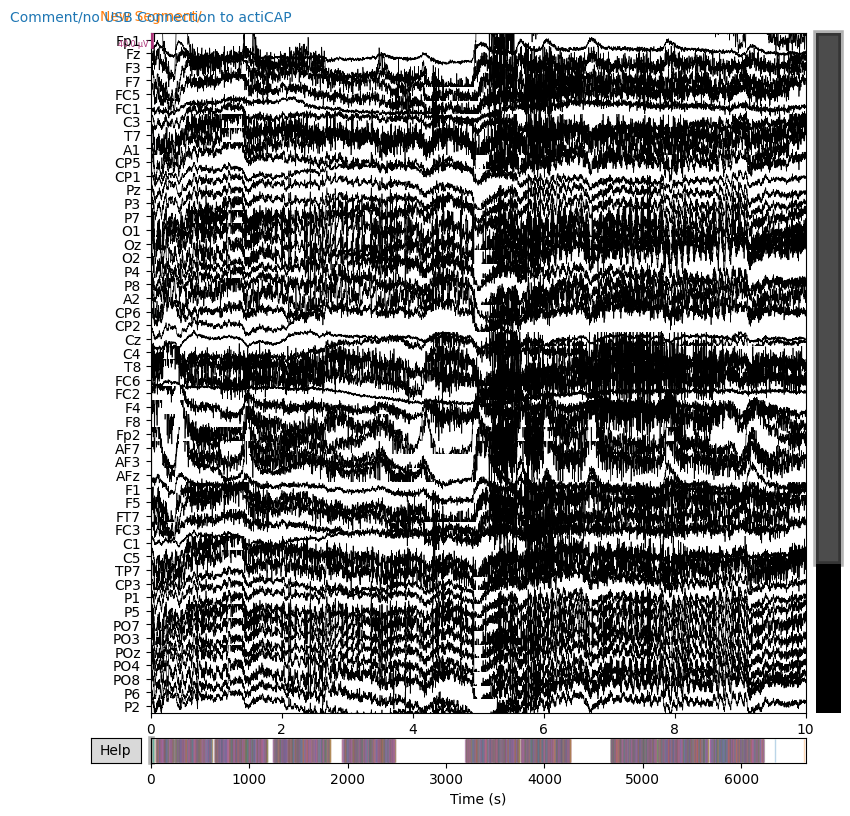

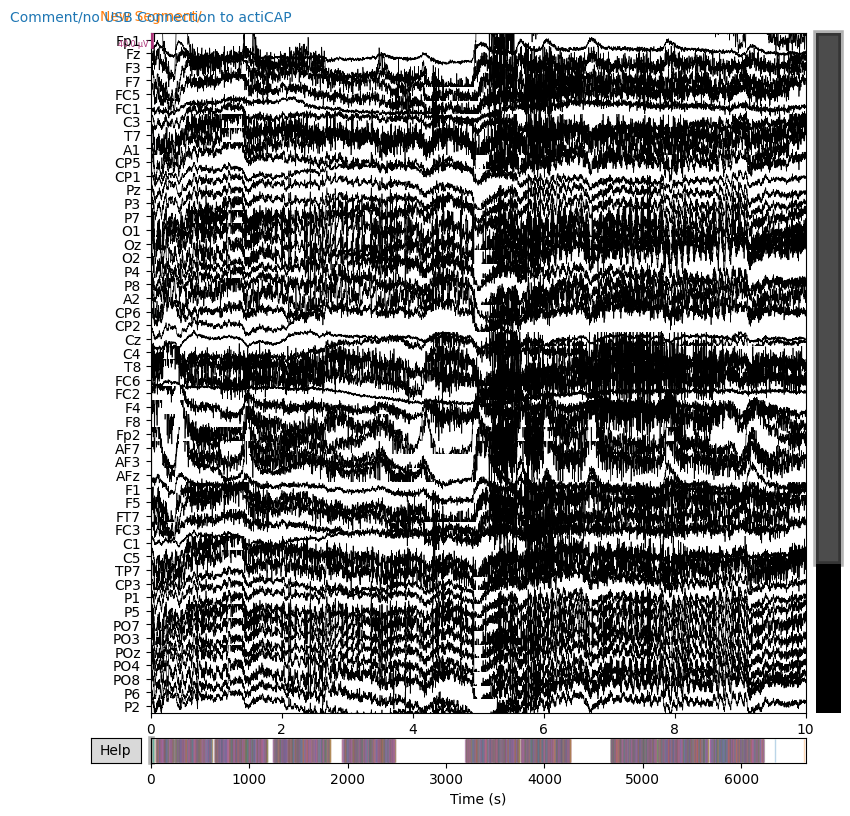

In [3]:
#load data
raw_file = "/Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/QiuLiesefeld_SSVEP_0001.vhdr"

raw = mne.io.read_raw_brainvision(raw_file,eog=('LO1', 'LO2', 'IO2'), misc='auto', scale=1.0, preload=True, verbose=None)
montage = make_standard_montage('standard_1020')
raw.set_montage(montage)
raw.set_channel_types({'LO1': 'eog', 'LO2': 'eog', 'IO2': 'eog'})

fig = raw.plot_sensors(show_names=True)
events = mne.events_from_annotations(raw)
print(raw)
print(raw.info)
raw.plot(n_channels=50)

Load and filter data, set up epochs. 


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8251 samples (33.004 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  4', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 17', 'Stimulus/S 18', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 34', 'Stimulus/S 35', 'Stimulus/S 45', 'Stimulus/S 48', 'Stimulus/S 49', 'Stimulus/S 52', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 65', 'Stimulus/S 66', 'Stimulus/S 79', 'Stimulus/S 80', 'Stimulus/S 82', 'Stimulus/S 83', 'Stimulus/S 93', 'Stimulus/S 96', 'Stimulus/S 97', 'Stimulus/S 98', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S150', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S200', 'Stimulus/S240', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S244']


[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    2.1s finished


Adding metadata with 40 columns
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 1051 original time points ...
0 bad epochs dropped
<Epochs |  179 events (all good), -0.2 - 4 sec, baseline off, ~92.0 MB, data loaded, with metadata,
 'Stimulus/S  1': 30
 'Stimulus/S  4': 38
 'Stimulus/S 31': 27
 'Stimulus/S 32': 30
 'Stimulus/S 34': 24
 'Stimulus/S 35': 30>
{'Stimulus/S  1': 1, 'Stimulus/S  4': 4, 'Stimulus/S 31': 31, 'Stimulus/S 32': 32, 'Stimulus/S 34': 34, 'Stimulus/S 35': 35}
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by explained variance: 53 components
Fitting ICA took 11.7s.


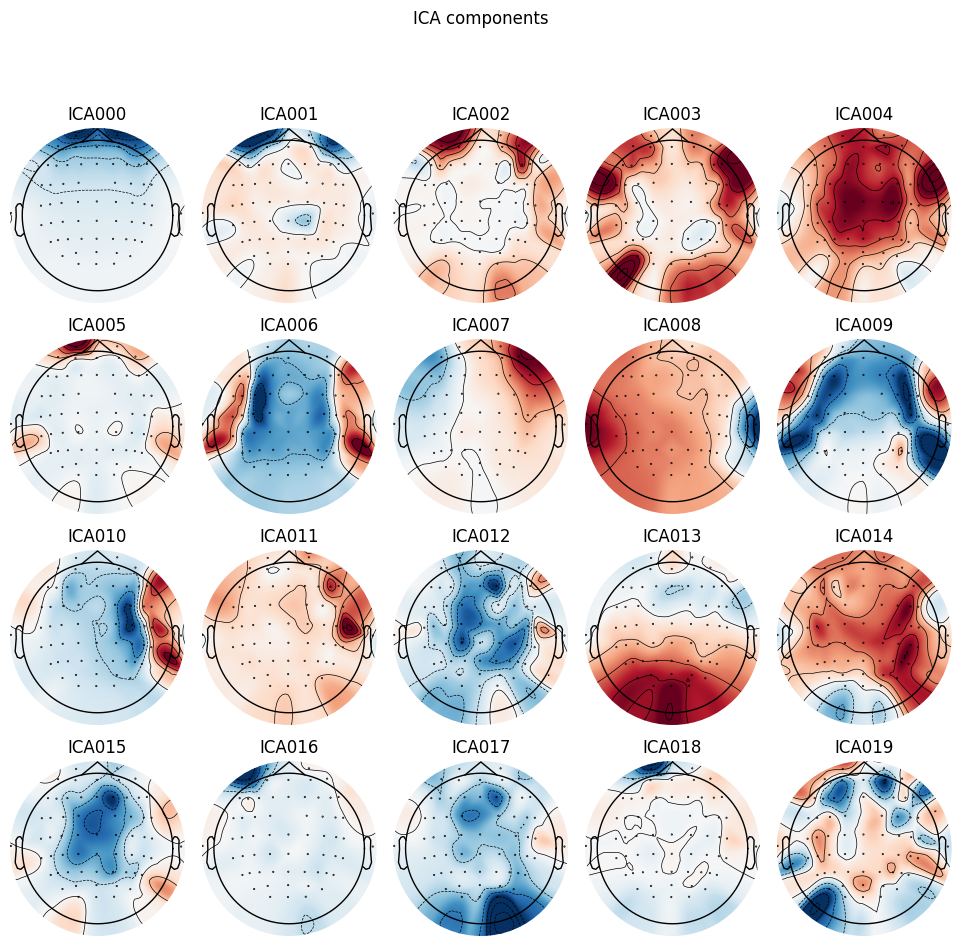

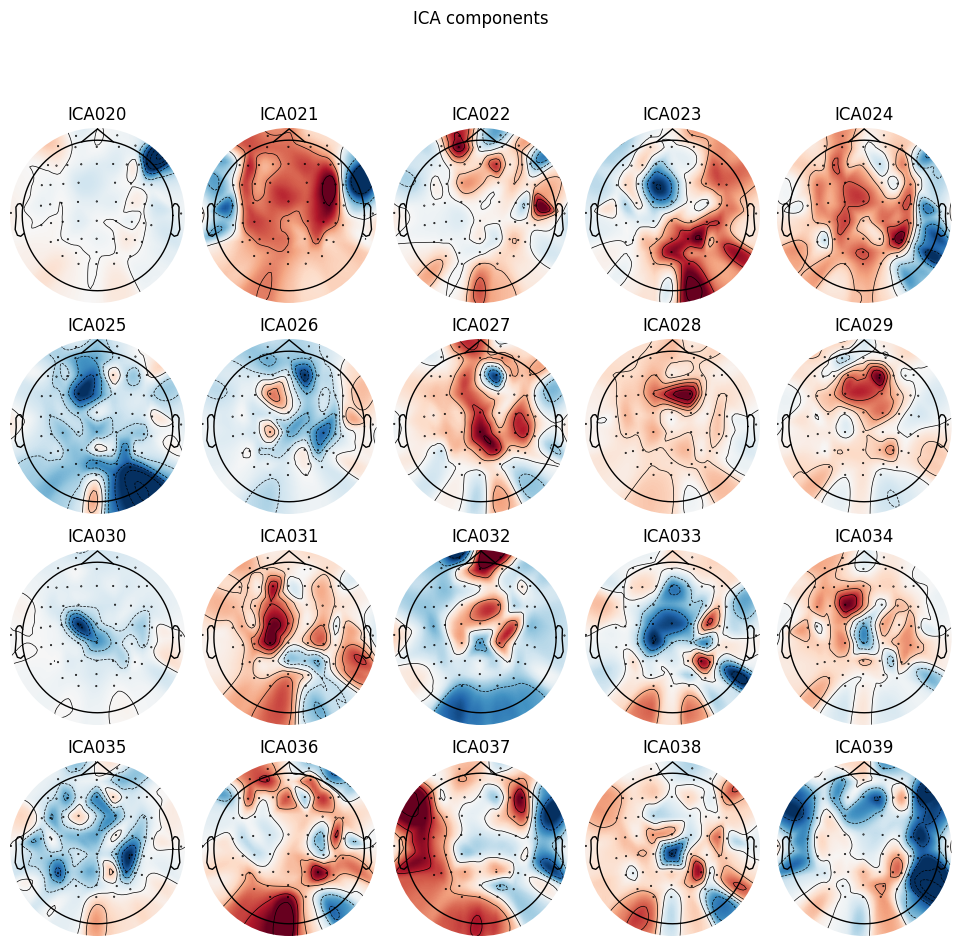

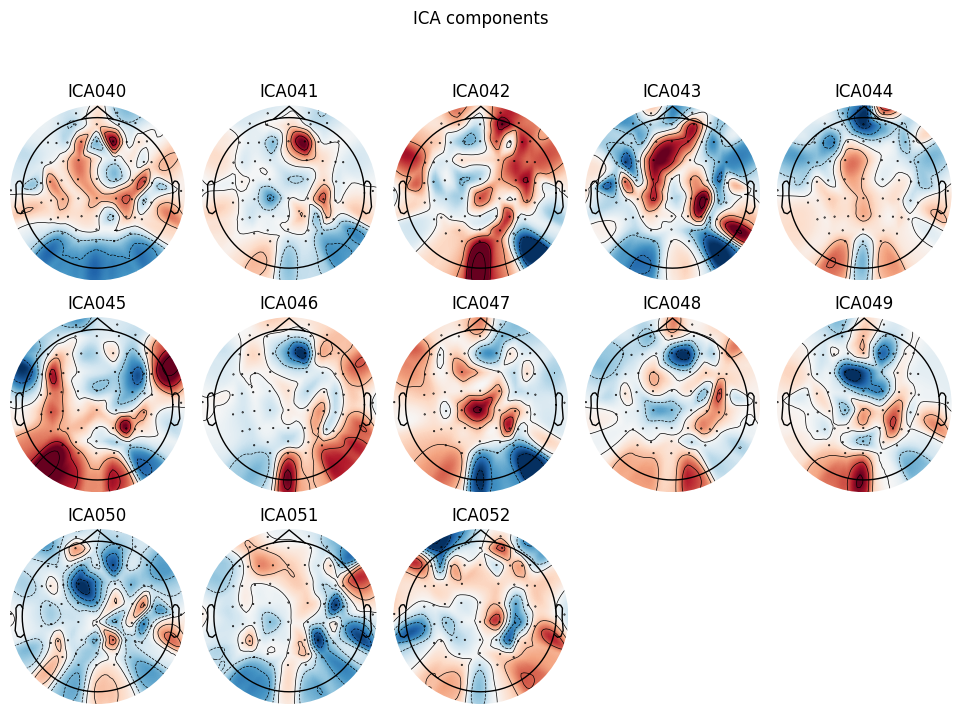

Not setting metadata
179 matching events found
No baseline correction applied
0 projection items activated


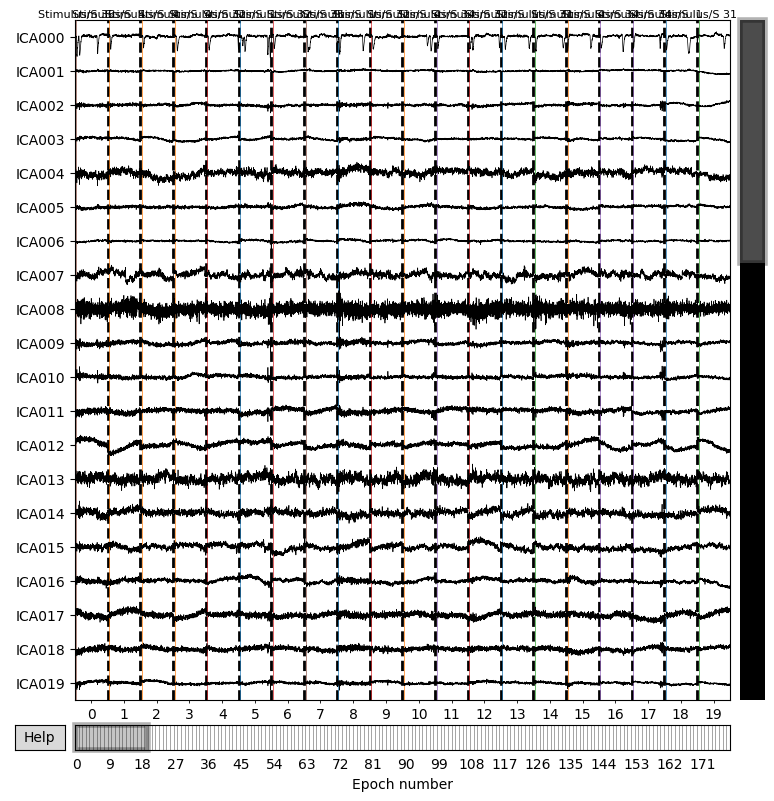

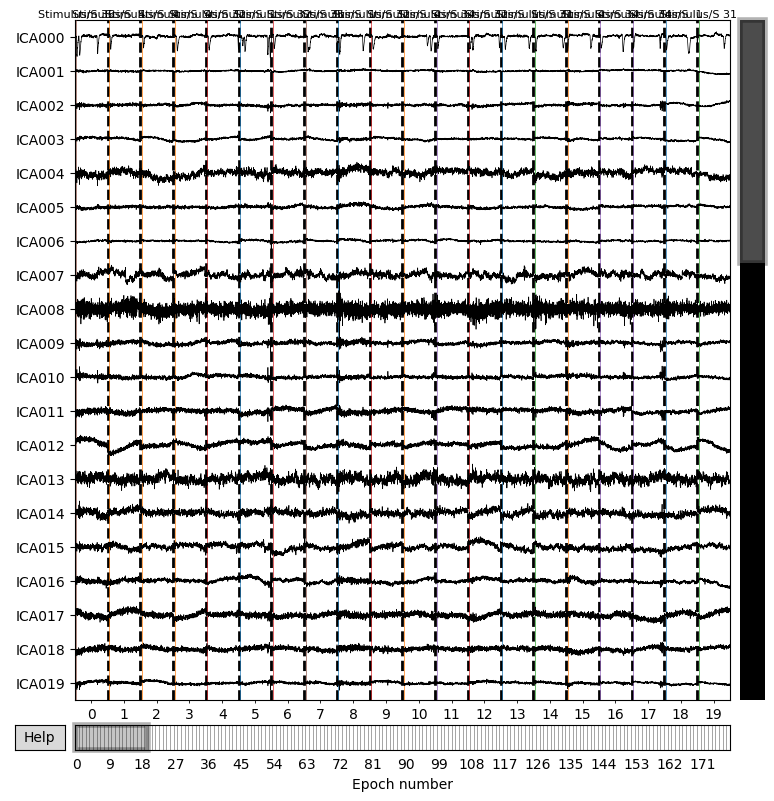

In [4]:
#resample
raw.resample(250, npad='auto')
#re-reference
raw.set_eeg_reference(['A1', 'A2'])
picks = mne.pick_types(raw.info, eeg=True, eog=False, stim=True, meg=True,exclude='bads')
raw.filter(0.1, 40, method='fir', fir_design='firwin')

##epochs
all_events, all_event_id = mne.events_from_annotations(raw)

tmin = -0.2
tmax = 4

metadata, events, event_id = mne.epochs.make_metadata(events=all_events, event_id=all_event_id, tmin=tmin, tmax=tmax, sfreq=raw.info['sfreq'] ,
                            row_events= ['Stimulus/S  4','Stimulus/S 31','Stimulus/S 34','Stimulus/S  1', 'Stimulus/S 32','Stimulus/S 35']) 
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin, tmax=tmax,metadata=metadata, baseline=None, preload=True)
epochs.metadata
print(epochs)
print(event_id)
epochs.metadata
reject = dict(mag=5e-12)

# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=0.999, max_iter=512, method='fastica')
ica.fit(epochs)
ica.plot_components()
ica.plot_sources(epochs)
# ica = mne.preprocessing.read_ica(ica)


# def run_ica(raw: mne.io.Raw, subject: str):
#     """ comments here."""
#     ica = ICA(n_components=0.999, max_iter=512, method='fastica')
#     ica.fit(raw)
#     ica.save('/Volumes/lu32pog/Nan_ssvep/EEG data and analysis/ica_exp2/{}-ssvep-ica.fif'.format(subject))
#     print(subject)

Using EOG channels: LO1, LO2, IO2
EOG channel index for this subject is: [ 4 26 63]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 1218 significant peaks
Number of EOG events detected: 1218
Not setting metadata
1218 matching events found
No baseline correction applied
Using data from preloaded Raw for 1218 events and 251 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


2 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


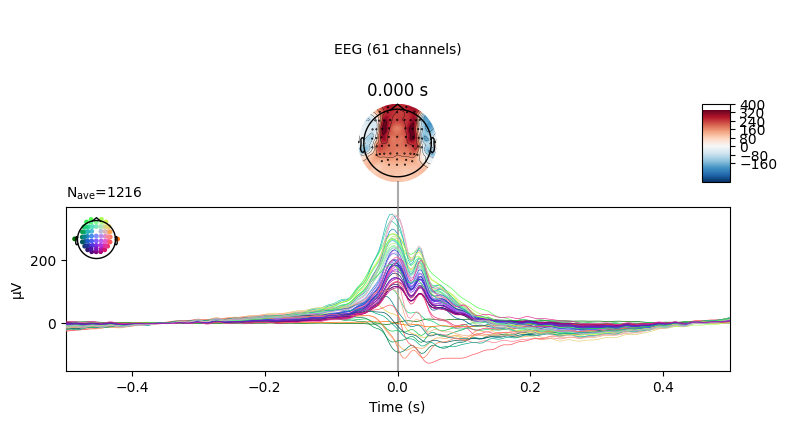

Using EOG channels: LO1, LO2, IO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    2.0s finished


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


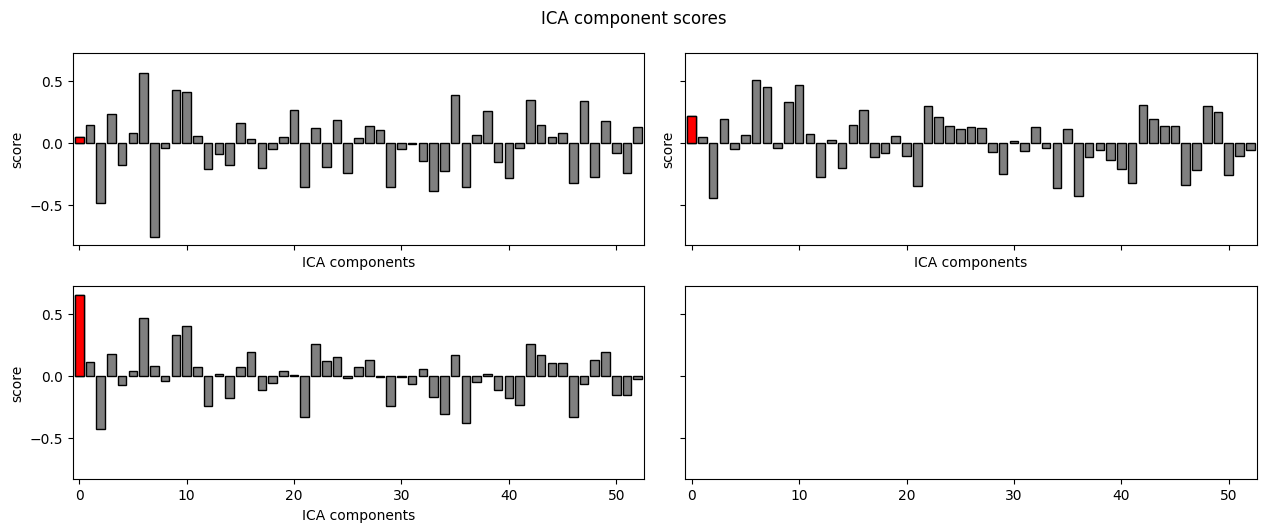

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
3328 matching events found
No baseline correction applied
0 projection items activated


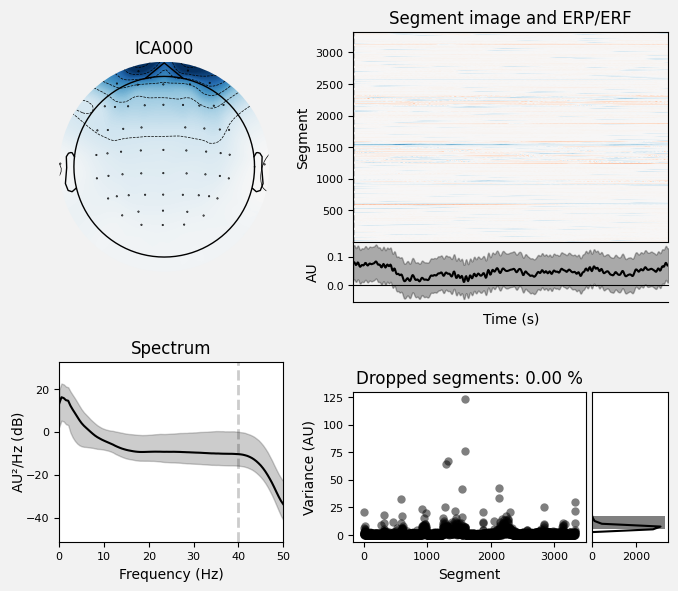

Creating RawArray with float64 data, n_channels=56, n_times=1664160
    Range : 0 ... 1664159 =      0.000 ...  6656.636 secs
Ready.


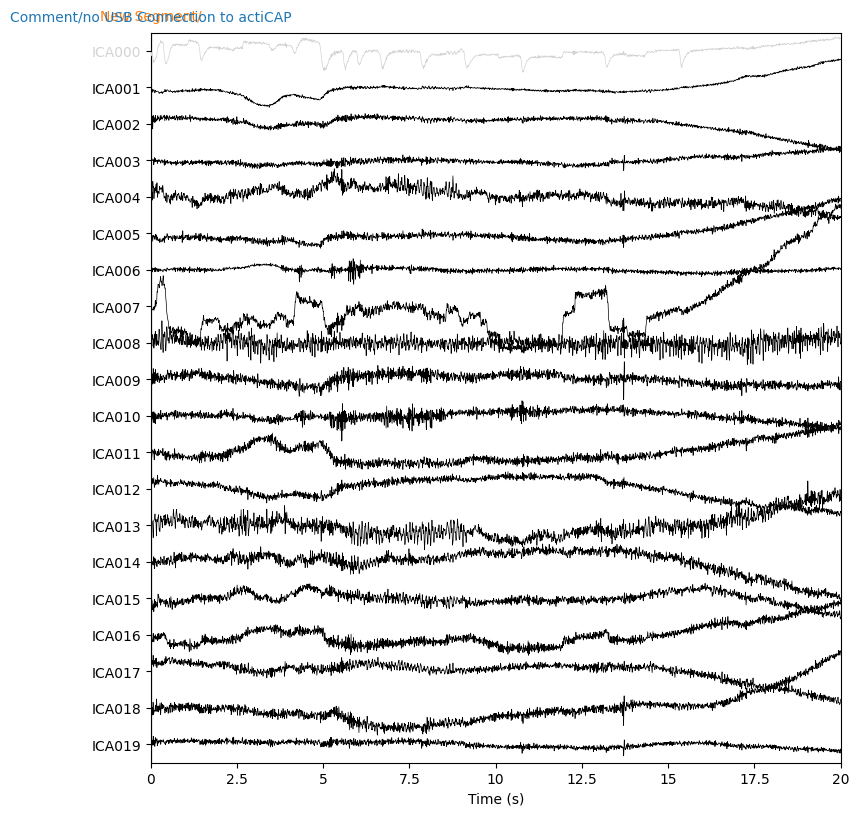

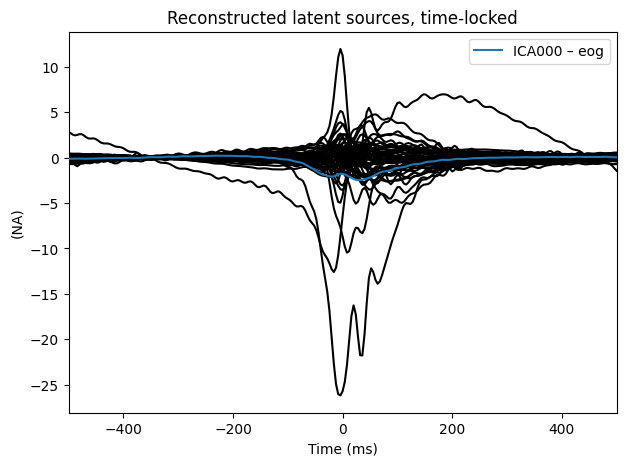

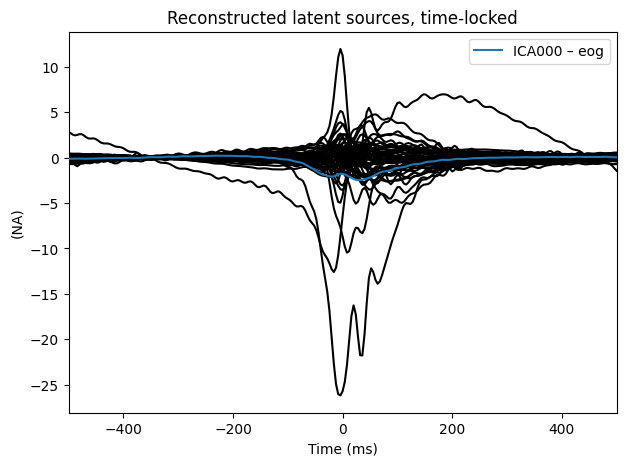

In [5]:
ica.exclude = []
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics
ica.plot_properties(raw, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(raw, show_scrollbars=False)

# plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
ica.plot_sources(eog_evoked)

In [7]:
# clean up memory before moving on
ica.save('/Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif', overwrite=True)

Writing ICA solution to /Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif...


/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_90494/1720470599.py:2: RuntimeWarning: This filename (/Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save('/Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif', overwrite=True)


<ICA | epochs decomposition, method: fastica (fit in 72 iterations on 188129 samples), 53 ICA components (61 PCA components available), channel types: eeg, 1 sources marked for exclusion>

Applying ICA to Raw instance
    Transforming to ICA space (53 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
Reading /Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif ...
Now restoring ICA solution ...
Ready.


/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_90494/4113964624.py:7: RuntimeWarning: This filename (/Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica(file_name)


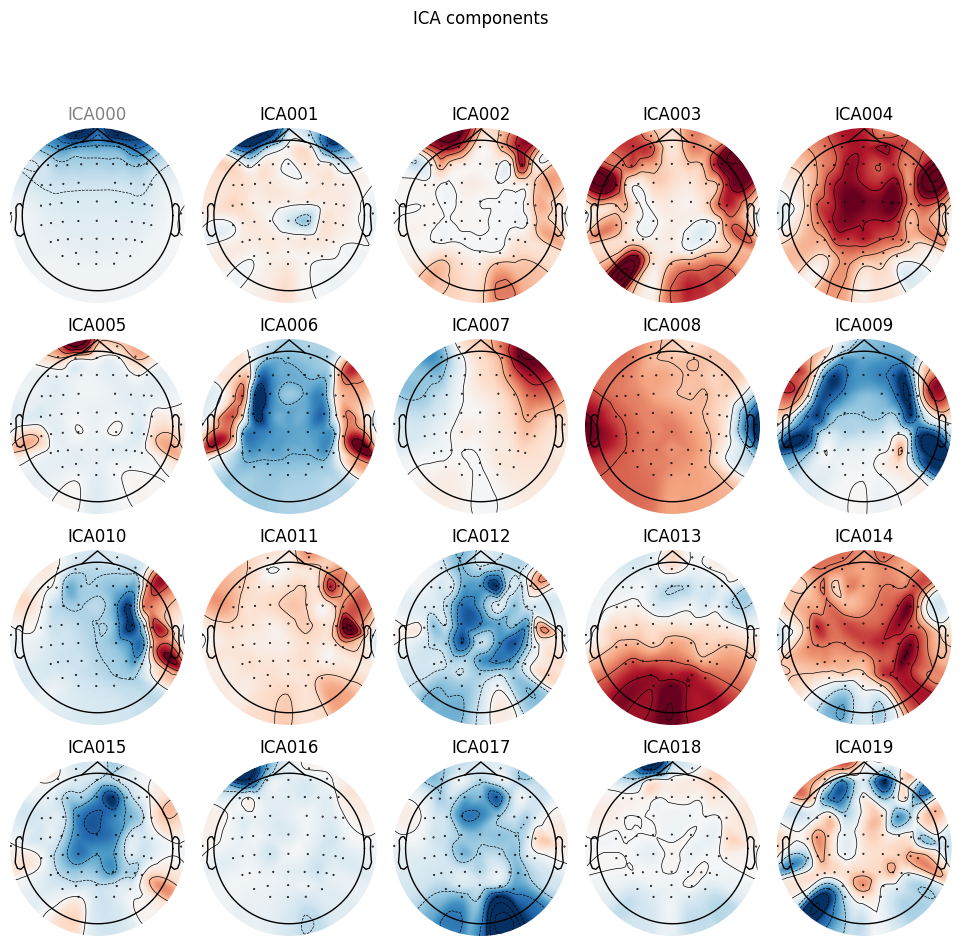

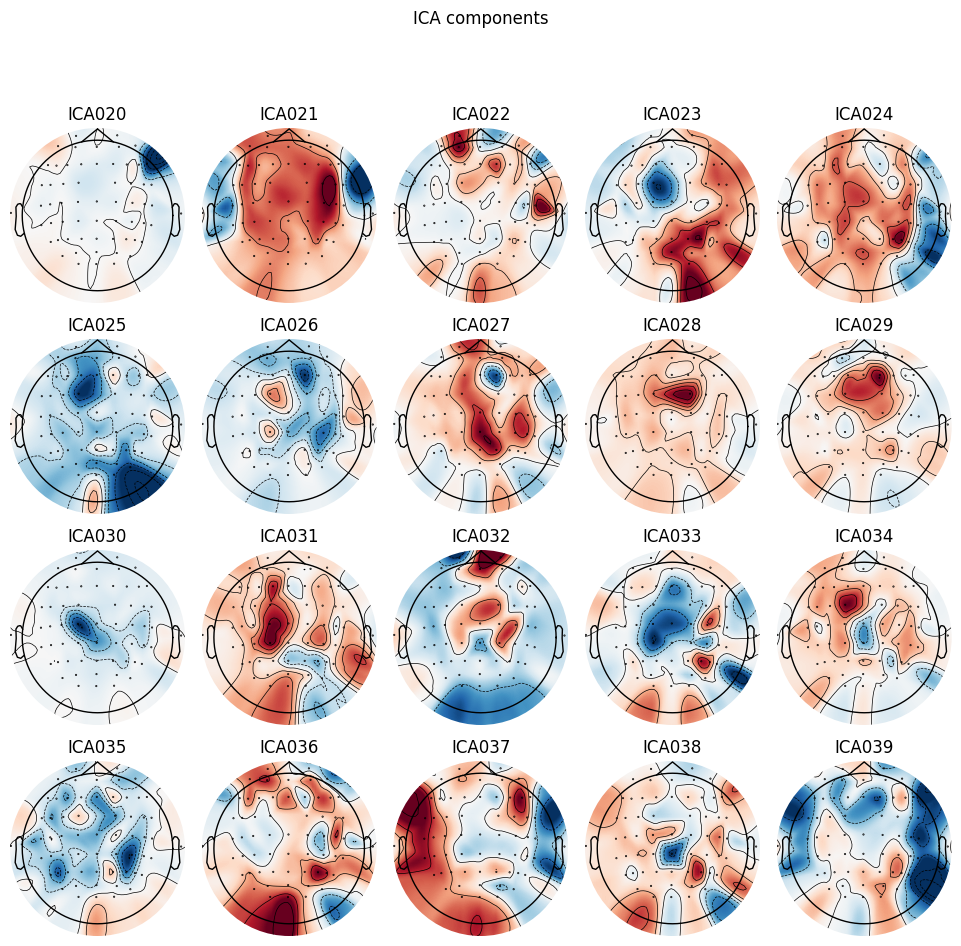

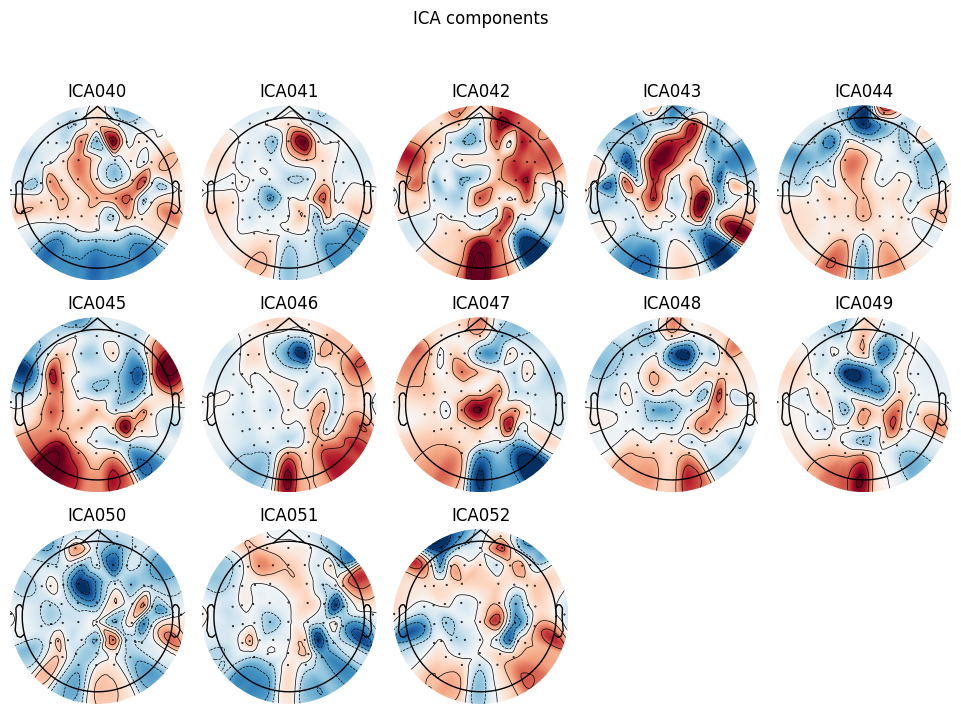

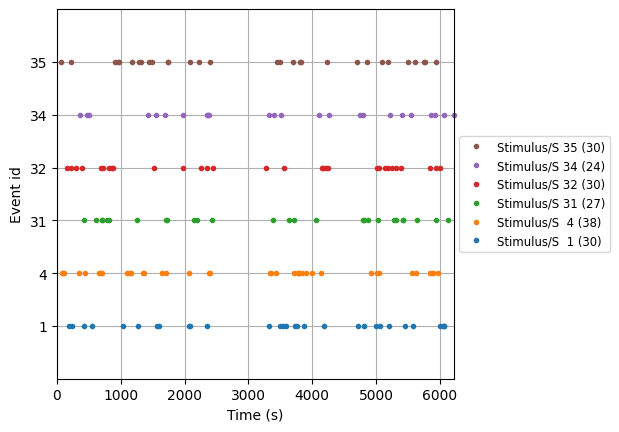

In [8]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)
# del raw, epochs  # free up memory

file_name = '/Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif'
ica = mne.preprocessing.read_ica(file_name)
ica.plot_components()
fig = mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)


# reject_criteria = dict(eeg=100e-6, eog=200e-6)  # 100 µV, 200 µV
# epochs.drop_bad(reject=reject_criteria)

In [9]:
epochs = ica.apply(epochs, exclude=ica.exclude)
epochs.apply_baseline((None, 0))
epochs.save(file_name,overwrite=True)  # remember, the data has been cleaned of bad ICs


Applying ICA to Epochs instance
    Transforming to ICA space (53 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
Applying baseline correction (mode: mean)
Overwriting existing file.


/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_90494/1337458897.py:3: RuntimeWarning: This filename (/Users/wangjiashun/Desktop/Encoding Model/rawdata_exp1/0001_ica_exp1_model.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(file_name,overwrite=True)  # remember, the data has been cleaned of bad ICs


In [10]:
epochs

<Epochs |  179 events (all good), -0.2 - 4 sec, baseline -0.2 – 0 sec, ~92.0 MB, data loaded, with metadata,
 'Stimulus/S  1': 30
 'Stimulus/S  4': 38
 'Stimulus/S 31': 27
 'Stimulus/S 32': 30
 'Stimulus/S 34': 24
 'Stimulus/S 35': 30>

In [29]:
# raw_fname = data_path + '/MEG/spm/SPM_CTF_MEG_example_faces%d_3D.ds'

# raw = io.read_raw_ctf(raw_fname % 1, preload=True)  # Take first run
# # Here to save memory and time we'll downsample heavily -- this is not
# # advised for real data as it can effectively jitter events!
# raw.resample(120., npad='auto')

# picks = mne.pick_types(raw.info, meg=True, exclude='bads')
# raw.filter(0.1, 30, method='fir', fir_design='firwin')

# events = mne.find_events(raw, stim_channel='UPPT001')

# # plot the events to get an idea of the paradigm
# mne.viz.plot_events(events, raw.info['sfreq'])

# event_ids = {"faces": 1, "scrambled": 2}

# tmin, tmax = -0.2, 0.6
# baseline = None  # no baseline as high-pass is applied
# reject = dict(mag=5e-12)

# epochs = mne.Epochs(raw, events, event_ids, tmin, tmax, picks=picks, baseline=baseline, preload=True, reject=reject)

# # Fit ICA, find and remove major artifacts
# ica = ICA(n_components=0.95, random_state=0).fit(raw, decim=1, reject=reject)

# # compute correlation scores, get bad indices sorted by score
# eog_epochs = create_eog_epochs(raw, ch_name='MRT31-2908', reject=reject)
# eog_inds, eog_scores = ica.find_bads_eog(eog_epochs, ch_name='MRT31-2908')
# ica.plot_scores(eog_scores, eog_inds)  # see scores the selection is based on
# ica.plot_components(eog_inds)  # view topographic sensitivity of components
# ica.exclude += eog_inds[:1]  # we saw the 2nd ECG component looked too dipolar
# ica.plot_overlay(eog_epochs.average())  # inspect artifact removal
# ica.apply(epochs)  # clean data, default in place

# evoked = [epochs[k].average() for k in event_ids]

# contrast = combine_evoked(evoked, weights=[-1, 1])  # Faces - scrambled

# evoked.append(contrast)

# for e in evoked:
#     e.plot(ylim=dict(mag=[-400, 400]))

# plt.show()

# # estimate noise covarariance
# noise_cov = mne.compute_covariance(epochs, tmax=0, method='shrunk',rank=None)
# # 

In [26]:
# [k for k in range(10)]

Visualize fields on MEG helmet




In [ ]:
# # The transformation here was aligned using the dig-montage. It's included in
# # the spm_faces dataset and is named SPM_dig_montage.fif.
# trans_fname = data_path + ('/MEG/spm/SPM_CTF_MEG_example_faces1_3D_'
#                            'raw-trans.fif')

# maps = mne.make_field_map(evoked[0], trans_fname, subject='spm',
#                           subjects_dir=subjects_dir, n_jobs=1)

# evoked[0].plot_field(maps, time=0.170)


Compute forward model




In [28]:
# src = data_path + '/subjects/spm/bem/spm-oct-6-src.fif'
# bem = data_path + '/subjects/spm/bem/spm-5120-5120-5120-bem-sol.fif'
# forward = mne.make_forward_solution(contrast.info, trans_fname, src, bem)

In [27]:
# # Compute inverse solution
# snr = 3.0
# lambda2 = 1.0 / snr ** 2
# method = 'dSPM'

# inverse_operator = make_inverse_operator(contrast.info, forward, noise_cov,
#                                          loose=0.2, depth=0.8)

# # Compute inverse solution on contrast
# stc = apply_inverse(contrast, inverse_operator, lambda2, method, pick_ori=None)
# # stc.save('spm_%s_dSPM_inverse' % contrast.comment)

# # Plot contrast in 3D with PySurfer if available
# brain = stc.plot(hemi='both', subjects_dir=subjects_dir, initial_time=0.170,
#                  views=['ven'], clim={'kind': 'value', 'lims': [3., 6., 9.]})
# # brain.save_image('dSPM_map.png')

In [25]:
import os
import mne
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel
from sklearn.utils import shuffle
import math

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)

In [14]:
epochs

<Epochs |  179 events (all good), -0.2 - 4 sec, baseline -0.2 – 0 sec, ~92.0 MB, data loaded, with metadata,
 'Stimulus/S  1': 30
 'Stimulus/S  4': 38
 'Stimulus/S 31': 27
 'Stimulus/S 32': 30
 'Stimulus/S 34': 24
 'Stimulus/S 35': 30>

In [15]:
event_id

{'Stimulus/S  1': 1,
 'Stimulus/S  4': 4,
 'Stimulus/S 31': 31,
 'Stimulus/S 32': 32,
 'Stimulus/S 34': 34,
 'Stimulus/S 35': 35}

In [16]:
epochs.metadata

event_name  Comment/no USB Connection to actiCAP  New Segment/  \
0    Stimulus/S 35                                   NaN           NaN   
1    Stimulus/S  4                                   NaN           NaN   
2    Stimulus/S  4                                   NaN           NaN   
3    Stimulus/S  4                                   NaN           NaN   
4    Stimulus/S 32                                   NaN           NaN   
..             ...                                   ...           ...   
174  Stimulus/S 34                                   NaN           NaN   
175  Stimulus/S  1                                   NaN           NaN   
176  Stimulus/S  1                                   NaN           NaN   
177  Stimulus/S 31                                   NaN           NaN   
178  Stimulus/S 34                                   NaN           NaN   

     Stimulus/S  1  Stimulus/S  4  Stimulus/S 14  Stimulus/S 15  \
0              NaN            NaN            NaN            NaN   
1              NaN            0.0            NaN            NaN   
2              NaN            0.0            NaN            NaN   
3              NaN            0.0            NaN            NaN   
4              NaN            NaN            NaN            NaN   
..             ...            ...            ...            ...   
174            NaN            NaN            NaN            NaN   
175            0.0            NaN            NaN            NaN   
176            0.0            NaN            NaN            NaN   
177            NaN            NaN            NaN            NaN   
178            NaN            NaN            NaN            NaN   

     Stimulus/S 17  Stimulus/S 18  Stimulus/S 31  ...  Stimulus/S104  \
0              NaN            NaN            NaN  ...            NaN   
1              NaN            NaN            NaN  ...            NaN   
2              NaN            NaN            NaN  ...            NaN   
3              NaN            NaN            NaN  ...            NaN   
4              NaN            NaN            NaN  ...            NaN   
..             ...            ...            ...  ...            ...   
174            NaN            NaN            NaN  ...            NaN   
175            NaN            NaN            NaN  ...            NaN   
176            NaN            NaN            NaN  ...            NaN   
177            NaN            NaN            0.0  ...            NaN   
178            NaN            NaN            NaN  ...          2.292   

     Stimulus/S150  Stimulus/S151  Stimulus/S152  Stimulus/S153  \
0            1.264          2.324            NaN            NaN   
1            1.424          3.808            NaN            NaN   
2            1.420          2.800            NaN            NaN   
3            1.592            NaN            3.5            NaN   
4            1.376          3.600            NaN            NaN   
..             ...            ...            ...            ...   
174          1.348          2.016            NaN            NaN   
175          1.216          2.332            NaN            NaN   
176          1.224          3.100            NaN            NaN   
177          1.592          3.600            NaN            NaN   
178          1.336          2.036            NaN            NaN   

     Stimulus/S200  Stimulus/S240  Stimulus/S241  Stimulus/S242  Stimulus/S244  
0              NaN            NaN            NaN            NaN            NaN  
1              NaN            NaN            NaN            NaN            NaN  
2              NaN            NaN            NaN            NaN            NaN  
3              NaN            NaN            NaN            NaN            NaN  
4              NaN            NaN            NaN            NaN            NaN  
..             ...            ...            ...            ...            ...  
174            NaN            NaN            NaN            NaN            Na

In [18]:
df = epochs.to_data_frame()
df.head()

time      condition  epoch       Fp1         Fz         F3        F7  \
0 -0.200  Stimulus/S 35      0 -3.638610  11.456690  15.046575  6.930670   
1 -0.196  Stimulus/S 35      0  0.644638   9.286671  11.798174  4.339164   
2 -0.192  Stimulus/S 35      0  6.597528  11.485923  12.868469  5.446919   
3 -0.188  Stimulus/S 35      0  9.014574  14.324957  15.322144  7.154035   
4 -0.184  Stimulus/S 35      0  7.082712  12.886064  13.864130  5.415473   

         LO1        FC5        FC1  ...       TP8         C6         C2  \
0 -14.351251  12.321551  15.892109  ...  4.092487   6.110313  14.856783   
1 -16.007986   7.768519  12.600361  ...  1.853986   5.712574  13.087454   
2 -10.727814   6.887447  13.015627  ...  1.644533   8.140352  14.480315   
3 -19.498666   7.568563  14.082404  ...  3.248392  10.949049  15.846608   
4 -13.945438   5.963508  11.572018  ...  4.389219  10.433747  13.498243   

         FC4       FT8         F6       AF8        AF4         F2        IO2  
0  10.600179  3.717472  -1.542436 -1.308926   3.363153   9.637151 -27.917401  
1  10.631299 -3.310109  -3.353007 -5.599145   3.945909   7.468369 -25.576126  
2  14.314727 -7.215810   2.940738 -5.247199   9.913616   9.902396 -19.598162  
3  17.452272 -5.264979  12.617404 -0.166576  16.168340  13.385809 -24.092492  
4  15.187440  1.271769  18.148487  6.646322  16.824181  12.645202 -14.367851  

[5 rows x 67 columns]

In [19]:
X = epochs.get_data() # (179, 59, 1051)
# print(X.shape)
y = epochs.events[:, 2]
# print(y.shape) # (179,)

In [26]:
# We will train the classifier on all left visual vs auditory trials on MEG

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear')
)

time_decod = SlidingEstimator(
    clf, n_jobs=None, scoring='accuracy', verbose=True)
# here we use cv=3 just for speed
scores = cross_val_multiscore(time_decod, X, y, cv=3, n_jobs=None)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wangjiashun/opt/anaconda3/envs/encoding/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Fitting SlidingEstimator : 1051/1051 [00:05<00:00,  183.65it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
100%|██████████| Fitting SlidingEstimator : 1051/1051 [00:05<00:00,  188.29it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Para

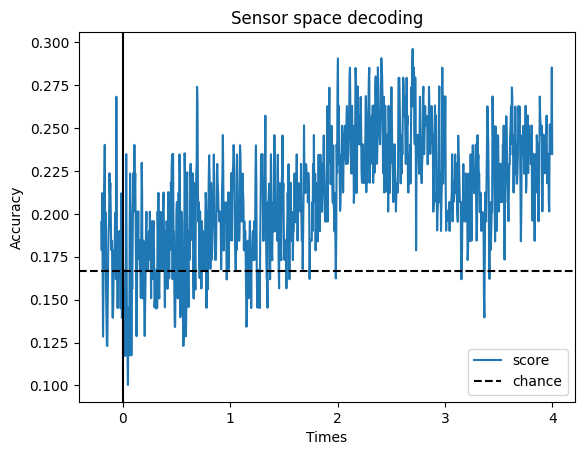

In [28]:

# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.axhline(1/6, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('Accuracy')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
fig

In [29]:
from collections import Counter
Counter(y)

Counter({35: 30, 4: 38, 32: 30, 1: 30, 34: 24, 31: 27})

In [30]:
# separate data by conditions
conds = list(Counter(y))
data_sub = {}
for cond in conds:
    data_sub[cond] = X[y==cond, :,:]

In [32]:
def moving_average_1D(x,w):
    return np.convolve(x, np.ones(w), 'same') / w

def moving_average(data, w=20):  #data.shape (80, 62, 2500)
    s = data.shape
    for i in range(s[0]):
        for j in range(s[1]):
            data[i,j,:] = moving_average_1D(data[i,j,:], w)
    return data

def moving_average_list(data, w=20):  #list of many (40, 62, 2500)
    for cond in data.keys():
        s = data[cond].shape
        for i in range(s[0]):
            for j in range(s[1]):
                data[cond][i,j,:] = moving_average_1D(data[cond][i,j,:], w)
    return data

data_sub = moving_average_list(data_sub, 20)


In [33]:
def channel_norm(data): #data (200, 62, 2500) (trials, channels, time)
    s = data.shape
    ch_mean = np.mean(data, axis = 1).reshape(s[0], 1, s[2])
    ch_std = np.std(data, axis = 1).reshape(s[0], 1, s[2])
    data = (data-ch_mean)/ch_std
    return data

def channel_norm_list(data): #data (200, 62, 2500) (trials, channels, time)
    #data_concat = np.concatenate([data[cond] for cond in conds])
    #s = data_concat.shape #(200, 62, 2500)
    #ch_mean = np.mean(data_concat, axis = (0,1)) # (2500)
    #ch_std = np.std(data_concat, axis = (0,1))

    
    for cond in data.keys():
        s = data[cond].shape
        ch_mean = np.mean(data[cond], axis = 1).reshape(s[0], 1, s[2])
        ch_std = np.std(data[cond], axis = 1).reshape(s[0], 1, s[2])
        data[cond] = (data[cond]-ch_mean)/ch_std
    
    return data
data_sub = channel_norm_list(data_sub)


In [35]:
from sklearn.svm import SVC

n_perm = 100
n_t = 1051

scores = np.zeros((n_perm,n_t))
for i in range(n_perm):
    if (i%10==0):
        print("iteration" + str(i))
    for cond in conds:
        data_sub[cond] = shuffle(data_sub[cond])  # 39/40/41x62x2500
        data_sub[cond] = np.array_split(data_sub[cond], 4) # train test split list of 4  10 (or 11)x62x2500
        data_sub[cond] = np.stack([fold.mean(axis=0) for fold in data_sub[cond]])  #4x62x2500 make sure dif n_trials won't break

    data_X_train = np.concatenate([data_sub[cond][0:3] for cond in conds])# (15, 62, 2500)
    data_y_train = np.array([np.ones(3)*i for i in range(len(conds))]).flatten()   # [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4]
    data_X_test = np.stack([data_sub[cond][3] for cond in conds]) # (5, 62, 2500)
    data_y_test = np.array([np.ones(1)*i for i in range(len(conds))]).flatten()   # [0,1,2,3,4]

    for t in range(n_t):
        # build a svc and fit
        clf = make_pipeline(StandardScaler(), SVC())
        clf.fit(data_X_train[:,:,t], data_y_train)
        scores[i, t] = clf.score(data_X_test[:,:,t], data_y_test)
# average across 100 iterations
scores = scores.mean(axis = 0)

iteration0
iteration10
iteration20
iteration30
iteration40
iteration50
iteration60
iteration70
iteration80
iteration90


Text(0.5, 1.0, 'Sensor space decoding')

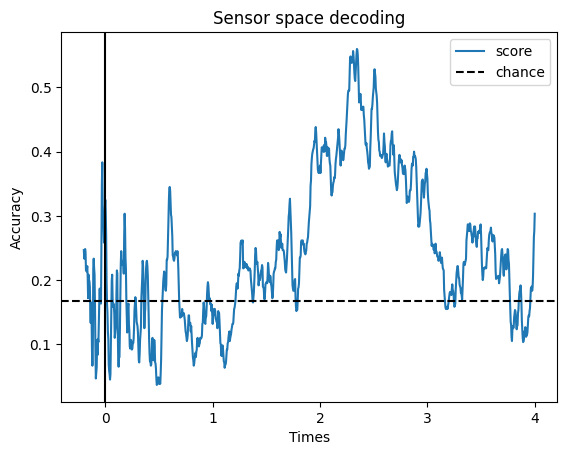

In [41]:
#plt.plot(scores)


# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.axhline(1/6, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('Accuracy')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')


In [37]:
%matplotlib inline